# 1. K-NN classifier

**Question** How does the k-nn algorithm work?

**Question** What are the parameters we need to choose to classify with k-NN? How can we choose them

**Question** What are the advantages and disadvantages of this algorithm? For which kind of dataset it would be appropriate and for which datasets it wouldn't?

**Question** How can we deal with nominal values in distance measurement?


In [42]:
# 3 KNN algorythm find n nerast neigbourth and choose the class that count the most. 
# It's N-number of neigbourhoods. You can check all posibilities or use binar searc h to find the best value of k.
# Disadvantages: 
#   - Log time of prediction. Algorythm without optymalization need to coutn distance for all pasibilities. 
#   - Course of demension - algorytm dosnt go well with many features (but sometimes it does hmmm)
#   - favour features with bigest scale (but we cen repair this with normalization)
#   - good modeling of non-linear boundary 
#   - withouty optymalization use lots of memory (need to remember all data)
# Advatages: 
#   - Easy to understend for nontechnical people
#   - No training time - when we want to add same new training examples we dont need to train it again. 
#   - no nedd to have many example
#   - Easy to understand paramiters 
#   - No ploblem with continous data 
#   - No problem with noise 
#   - Many distance funcion to use 

# You can put nominal values in order or use distance function for noiminal values. 

In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, we load the required packages:

In [43]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [44]:
def read_data(path):
    #TODO replace the following line with our code
    return pd.read_csv(path).drop(["name", "status"], axis=1), pd.read_csv(path)["status"]

data_X, data_Y = read_data("parkinsons.data")

Let's see what we have loaded.

In [45]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [46]:
data_Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

#### 1.2. Let's analyse the given data. 
* How many attributes are in given data?
* Are the attributes on the common scale?
* Are observations equally distributed for sick and healthy people?

Plot the histogram of the assigned class and analyse the distribution.


count of atributes in data:  22
for: MDVP:Fo(Hz) max:  260.105 min:  88.333
for: MDVP:Fhi(Hz) max:  592.03 min:  102.145
for: MDVP:Flo(Hz) max:  239.17 min:  65.476
for: MDVP:Jitter(%) max:  0.03316 min:  0.00168
for: MDVP:Jitter(Abs) max:  0.00026 min:  7e-06
for: MDVP:RAP max:  0.02144 min:  0.00068
for: MDVP:PPQ max:  0.01958 min:  0.00092
for: Jitter:DDP max:  0.06433 min:  0.00204
for: MDVP:Shimmer max:  0.11908 min:  0.00954
for: MDVP:Shimmer(dB) max:  1.302 min:  0.085
for: Shimmer:APQ3 max:  0.05647 min:  0.00455
for: Shimmer:APQ5 max:  0.0794 min:  0.0057
for: MDVP:APQ max:  0.13778 min:  0.00719
for: Shimmer:DDA max:  0.16942 min:  0.01364
for: NHR max:  0.31482 min:  0.00065
for: HNR max:  33.047 min:  8.441
for: RPDE max:  0.685151 min:  0.25657
for: DFA max:  0.825288 min:  0.574282
for: spread1 max:  -2.434031 min:  -7.964984
for: spread2 max:  0.450493 min:  0.006274
for: D2 max:  3.671155 min:  1.423287
for: PPE max:  0.527367 min:  0.044539


(array([ 48., 147.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

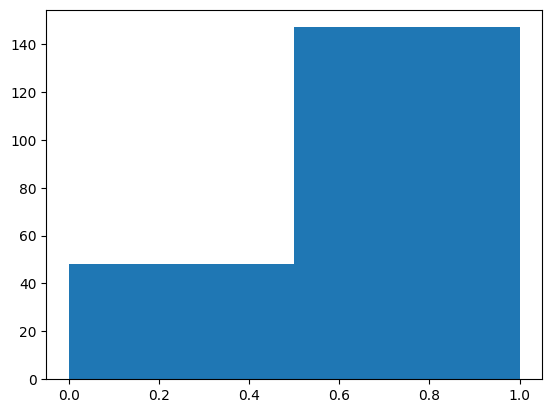

In [47]:
#TODO
print("count of atributes in data: ", len(data_X.columns))

for column_name in data_X.columns:
    print("for:", column_name, "max: ", data_X[column_name].max(), "min: ", data_X[column_name].min())
# nope, differen scale, need stanadarization

plt.hist(data_Y, bins=2)
# no, there is more of sick people 

Plot the histograms of the first 5 attributes. 

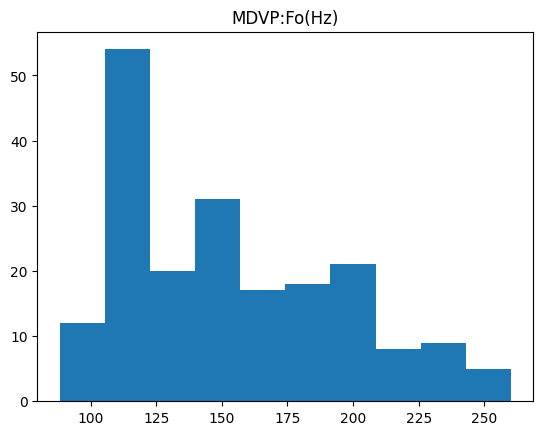

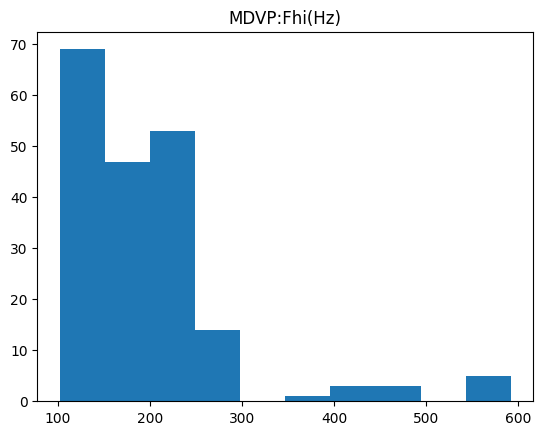

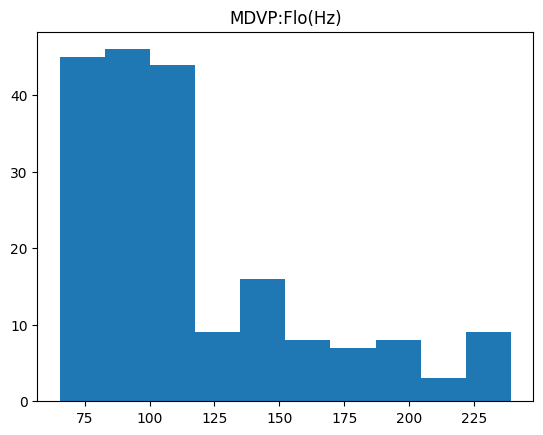

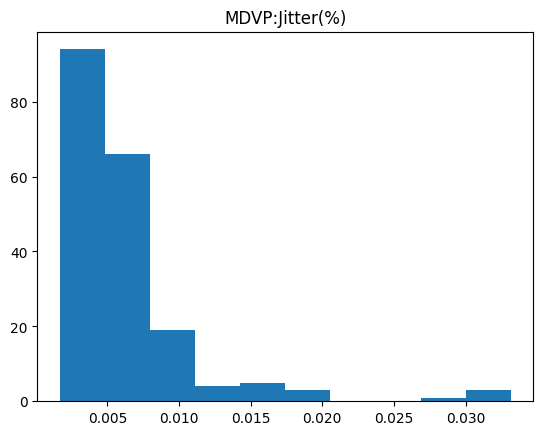

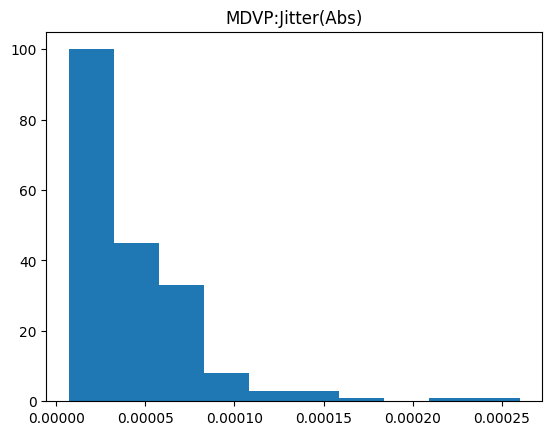

In [48]:
for column_name in data_X.columns[:5]:
    plt.hist(data_X[column_name])
    plt.title(column_name)
    plt.show()

# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [49]:
def split_data(data_X, data_Y, test_percent = 20, random_state=5):
    X_train, X_test, y_train, y_test = train_test_split(
        data_X, data_Y, test_size=test_percent/100, random_state=random_state)
    
    return (X_train,y_train, X_test, y_test), X_train.columns

(train_X, train_Y, test_X, test_Y), name_of_columns = split_data(data_X, data_Y)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set:  156
rows in test set: 39


# 4. Data standarization/normalization
#### 4.1. Use k-nn algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [50]:
from sklearn.metrics import accuracy_score
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 3):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_data_X, train_data_Y)
    return accuracy_score(test_data_Y, knn.predict(test_data_X))


get_classification_accuracy(train_X, train_Y, test_X, test_Y)

0.7692307692307693

#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import MaxAbsScaler

def standarize_train_and_test(transformer, train_X, test_X):

    t = transformer.fit(train_X)
    return t.transform(train_X), t.transform(test_X)

for transformer in {StandardScaler(), MinMaxScaler(), MaxAbsScaler()}:
    norm_train_X, norm_test_X = standarize_train_and_test(transformer, train_X, test_X)
    print(transformer, get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y))

MinMaxScaler() 0.9743589743589743
StandardScaler() 0.9743589743589743
MaxAbsScaler() 0.9743589743589743


# 5. Choosing k value
Using obtained in previous exercices train set with normalization/standarization use k-nn algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

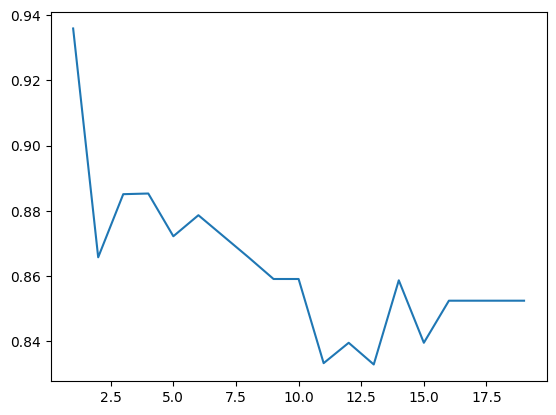

In [52]:
# TODO
from sklearn.model_selection import cross_validate

norm_train_X, norm_test_X = standarize_train_and_test(StandardScaler(), train_X, test_X)

s={}
for k in range(1, 20):
    cv_results = cross_validate(KNeighborsClassifier(k), norm_train_X, train_Y, cv=5)
    s[k] = cv_results['test_score'].mean()

plt.plot(list(s.keys()), list(s.values()))


In [ ]:
# The best result is for k=1. 

# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [53]:
# TODO
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k= 1)

0.9743589743589743

# 7. Homework
You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value. Write a report containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

**Deadline +2 weeks**
    
    

In [79]:
df = pd.read_csv("winequality-red.csv", index_col=0)

X_train, X_test, y_train, y_test = train_test_split(
        df.drop(["quality"], axis=1), df["quality"], test_size=0.3, random_state=43)

In [80]:
X_train

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,,,,,,,,,,
8.2,0.39,0.49,2.3,0.099,47.0,133.0,0.99790,3.38,0.99,9.8
7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
10.1,0.45,0.23,1.9,0.082,10.0,18.0,0.99774,3.22,0.65,9.3
6.1,0.53,0.08,1.9,0.077,24.0,45.0,0.99528,3.60,0.68,10.3
7.7,0.58,0.10,1.8,0.102,28.0,109.0,0.99565,3.08,0.49,9.8
...,...,...,...,...,...,...,...,...,...,...
8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5
7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0
11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1


In [82]:

standardscaler = StandardScaler().fit(X_train)
X_train_norm = standardscaler.transform(X_train)
X_test_norm = standardscaler.transform(X_test)


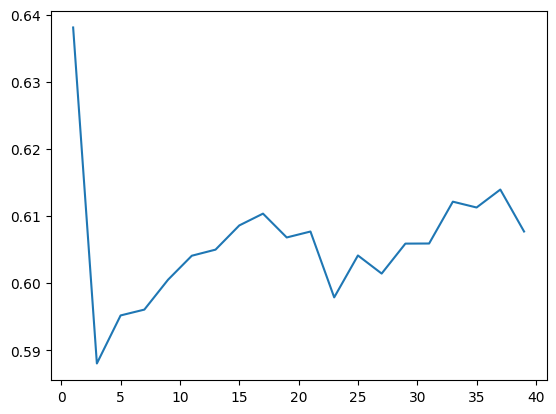

In [86]:
s={}
for k in range(1, 40, 2):
    cv_results = cross_validate(KNeighborsClassifier(k), X_train_norm, y_train, cv=5)
    s[k] = cv_results['test_score'].mean()
plt.plot(list(s.keys()), list(s.values()))



In [87]:
df = pd.read_csv("winequality-red.csv", index_col=0)
standardscaler = StandardScaler().fit(df.drop(["quality"], axis=1))
X_train_norm = standardscaler.transform(df.drop(["quality"], axis=1))

cv_results = cross_validate(KNeighborsClassifier(1), X_train_norm, df["quality"], cv=5)
cv_results['test_score'].mean()


0.5203115203761756

In [ ]:
# I choose k = 1, becouse it's the best k I checked. 